This code extracts and processes text from PDFs, prepares it for machine learning, trains a Random Forest model, and evaluates its performance.

1. Converts PDFs to text : Converts PDF documents to text using OCR (Optical Character Recognition) with pytesseract

2. Process PDF Files: Reads PDF files from a specified directory.Extracts text and labels the documents based on filenames.                           Saves the extracted data (filename, text, label) to a CSV file.

3. Cleans and processes the text data: Cleans the text by lowering case, removing punctuation, digits, extra spaces, and                             stopwords.

4. Converts text data into numerical features using TF-IDF and encodes labels: Converts cleaned text into numerical features                         using TF-IDF. Encodes labels into a binary format.

5. Applies dimensionality reduction for visualization and data splitting: Reduces feature dimensions using SVD for easier                             visualization.Splits the data into training and testing sets.Converts one-hot encoded labels to single-                         column format.

6. Trains a Random Forest classifier: Trains a Random Forest classifier on the training data.

7. Visualizes the data and decision boundary in 3D:Plots a 3D scatter plot of the data using 3 most important features
                       
8. Evaluates the model: Predicts labels for the test data and evaluates the model’s accuracy.

In [1]:
import pytesseract
from pdf2image import convert_from_path
from PIL import Image
import os 
import pandas as pd

In [2]:
def pdf_to_text(pdf_path):
    images = convert_from_path(pdf_path)
    text = ""
    for image in images:
        text = text + pytesseract.image_to_string(image)
    return text

In [3]:
pdf_dir = r"C:\Users\Sanchana\Desktop\MLP\USAPropertyDocuments"
pdf_files = [os.path.join(pdf_dir, file) for file in os.listdir(pdf_dir) if file.endswith('.pdf')]

In [4]:
data = {'filename':[],'text':[],'label':[]}

In [5]:
for file in pdf_files:
    fname = os.path.basename(file)
    extracted_text = pdf_to_text(file)
    if fname.startswith('M'):
        label = 'Mortage'
    elif fname.startswith('P'):
        label = 'Partnership'
    else:
        label = 'Trust'
    data['filename'].append(fname)
    data['text'].append(extracted_text)
    data['label'].append(label)

In [6]:
df = pd.DataFrame(data)
csv_path = r'Mortage.csv'
df.to_csv(csv_path,index=False)

In [7]:
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sanchana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('','',string.punctuation))
    text = re.sub(r'\d+', '',text)
    text = ' '.join(text.split())
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [9]:
df['cleaned_text'] = df['text'].apply(clean_text)

In [10]:
df.drop(['filename','text'],axis=1)

,label,cleaned_text
0,Mortage,springside mortgage oeyr mortgage statement st...
1,Mortage,springside mortgage mortgage statement custoni...
2,Mortage,— certified copy wationsl city bank indiana or...
3,Mortage,southfield bank mortgage agreement parties mor...
4,Mortage,b cc e f g h form leave space clear affix addi...
5,Mortage,loan estimate vale tome jo year ea bue le weer...
6,Mortage,peathered nest mortgage company canada mortgag...
7,Partnership,prepared recording please retum paul barker pa...
8,Partnership,rs stamp paper partnership deed deed partnersh...
9,Partnership,deed partnership deed partnership made bilaspu...


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

vec = TfidfVectorizer()
enc = OneHotEncoder()

X = vec.fit_transform(df['cleaned_text'])
Y = enc.fit_transform(df['label'].values.reshape(-1, 1))

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [13]:
print("Feature Names:\n", vec.get_feature_names_out())

Feature Names:
 ['aad' 'aan' 'ab' ... 'ys' 'zeh' 'zittau']


In [14]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3, random_state=42)
X_reduced = svd.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=42)

In [16]:
import numpy as np
Y_train_single = np.argmax(Y_train, axis=1)
Y_test_single = np.argmax(Y_test, axis=1)

In [17]:
from sklearn.ensemble import RandomForestClassifier
X_train = np.asarray(X_train)
Y_train_single = np.asarray(Y_train_single)

clf = RandomForestClassifier()
clf.fit(X_train, Y_train_single)

C:\Users\Sanchana\anaconda\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

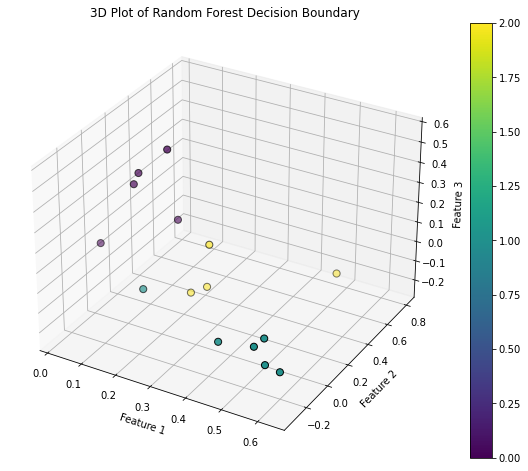

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


sc = ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=Y_train_single, cmap='viridis', edgecolor='k', s=50)


ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')


plt.colorbar(sc)


plt.title("3D Plot of Random Forest Decision Boundary")
plt.show()

In [19]:
X_test = np.asarray(X_test)
Y_pred = clf.predict(X_test)

In [20]:
print(Y_pred)

[0 2 0 0 1]


In [21]:
print(Y_test_single)

[[0]
 [2]
 [2]
 [0]
 [1]]


In [22]:
Y_test_single = np.asarray(Y_test_single)
Y_test_single = Y_test_single.ravel()

In [23]:
print(Y_test_single)

[0 2 2 0 1]


In [24]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test_single, Y_pred)
print(f"Accuracy of the Random Forest model: {accuracy * 100:.2f}%")

Accuracy of the Random Forest model: 80.00%
